Data Prep

In [76]:
import pandas as pd
import numpy as np

train_data = pd.read_csv("data/train.csv", usecols=["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Embarked"])
submission_data = pd.read_csv("data/test.csv", usecols=["PassengerId", "Pclass", "Sex", "Age", "SibSp", "Parch", "Embarked"])
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [77]:
train_data = pd.get_dummies(train_data.fillna(0))
submission_data = pd.get_dummies(submission_data.fillna(0))
submission_pids = submission_data["PassengerId"]
submission_data = submission_data.drop(columns=["PassengerId"])

try:
    train_data = train_data.drop(columns=["Embarked_0"])
    submission_data = submission_data.drop(columns=["Embarked_0"])
except:
    pass

train_data.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [78]:

train_data = np.array(train_data)
submission_data = np.array(submission_data)

Decision Tree

In [110]:
from sklearn import tree
import matplotlib.pyplot as plt

N = len(train_data)
x_train = train_data[:int(N*.8),1:]
y_train = train_data[:int(N*.8),0]
x_test = train_data[int(N*.8):,1:]
y_test = train_data[int(N*.8):,0]

clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(x_train, y_train)

x_train.shape, y_train.shape

((712, 9), (712,))

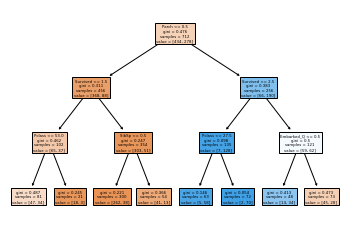

In [111]:
plt.figure()
tree.plot_tree(clf, filled=True, feature_names=['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'])
plt.savefig("out/tree.jpeg", dpi=600)

In [112]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = clf.predict(x_test)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[110   5]
 [ 26  38]]
              precision    recall  f1-score   support

         0.0       0.81      0.96      0.88       115
         1.0       0.88      0.59      0.71        64

    accuracy                           0.83       179
   macro avg       0.85      0.78      0.79       179
weighted avg       0.84      0.83      0.82       179



In [114]:
submission = clf.predict(submission_data)
submission = np.append(np.array(submission_pids).reshape(-1,1), submission.reshape(-1,1), axis=1)
submission.shape
pd.DataFrame(submission, columns=["PassengerId", "Survived"], dtype=np.int32).to_csv("out/submission.csv", index=False, columns=["PassengerId", "Survived"])

Random Forest

In [115]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
max_samples = int(len(x_train)*.30)
clf = RandomForestClassifier(n_estimators=1000, max_depth=6, n_jobs=-1, max_samples=max_samples)
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[107   8]
 [ 18  46]]
              precision    recall  f1-score   support

         0.0       0.86      0.93      0.89       115
         1.0       0.85      0.72      0.78        64

    accuracy                           0.85       179
   macro avg       0.85      0.82      0.84       179
weighted avg       0.85      0.85      0.85       179

